<h1>install dan import library</h1>

install library python

In [ ]:
!pip install pandas matplotlib seaborn numpy

import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import data dari file csv

In [3]:

df = pd.read_csv("indonesian-names.csv")


lihat data

In [4]:
df

,Nama,Jenis_Kelamin
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


<h1>Cleaning Data</h1>

In [ ]:
df = (
    df
    .dropna()
    .drop_duplicates()
)
df = df.select_dtypes(include='object')
df

,Nama,Jenis_Kelamin
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


<h1>Distribusi nama berdasarkan kelamin</h1>

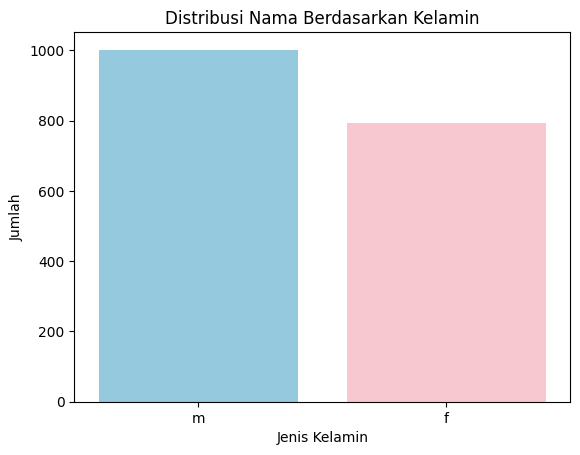

In [6]:
sns.countplot(x='Jenis_Kelamin', data=df,palette={'m':'skyblue','f':'pink'},hue='Jenis_Kelamin',legend=False)
plt.title('Distribusi Nama Berdasarkan Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

<h1>frekuensi banyak kata dalam sebuah nama</h1>

<h1>Nama dengan frekuensi paling sering</h1>

<h3>persiapan data</h3>

In [29]:
nama_split = df['Nama'].astype(str).str.split()
df['First_Name'] = nama_split.str[0].str.title()
df['Last_Name']  = nama_split.str[1].where(nama_split.str.len() >= 2).str.title() 

#M=muhammad
df['First_Name']=df['First_Name'].replace('M.','Muhammad')

#data frame frekuensi nama awal
first_name_freq = df['First_Name'].value_counts().reset_index()
first_name_freq.columns = ['First_Name', 'Frekuensi']
#data frame frekuensi nama akhir
last_name_freq = df['Last_Name'].value_counts().reset_index()
last_name_freq.columns = ['Last_Name', 'Frekuensi']

In [30]:
print("Top 10 Frekuensi First Name")
first_name_freq.head(10)  

Top 10 Frekuensi First Name


,First_Name,Frekuensi
0,Muhammad,82
1,Siti,35
2,Ahmad,25
3,Sri,17
4,Nur,15
5,Dewi,15
6,Tri,14
7,Eka,9
8,Agus,9
9,Abdul,9


In [31]:
print("Top 10 Frekuensi Last Name")
last_name_freq.head(10)

Top 10 Frekuensi Last Name


,Last_Name,Frekuensi
0,Dwi,25
1,Nur,16
2,Ayu,12
3,Lestari,12
4,Kurniawan,11
5,Tri,10
6,Maulana,9
7,Putra,8
8,Al,8
9,Setiawan,8


<h3>bar chart untuk frekuensi nama awal</h3>

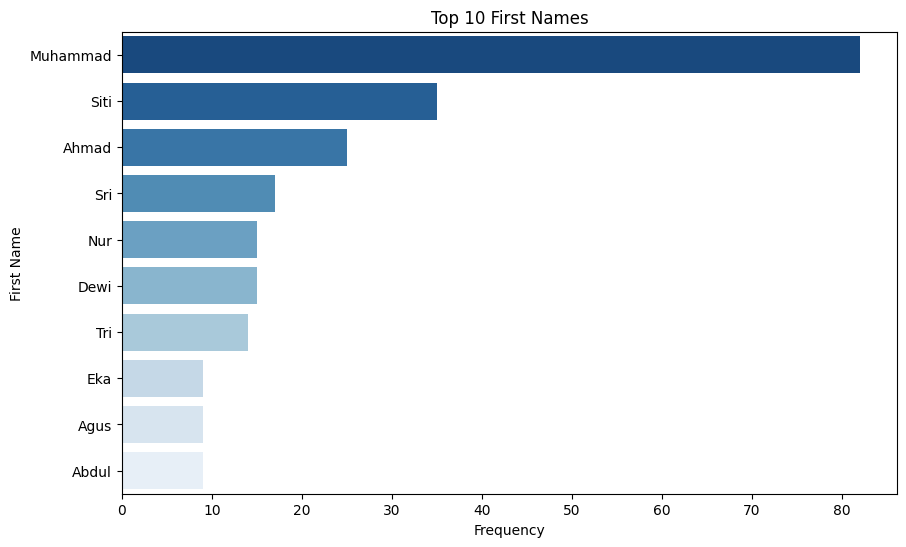

In [43]:
# Bar chart for First Name
plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='First_Name', data=first_name_freq.head(10),hue='First_Name', palette='Blues_r')
plt.title('Top 10 First Names')
plt.xlabel('Frequency')
plt.ylabel('First Name')
plt.show()

<h3>bar chart untuk frekuensi nama akhir</h3>

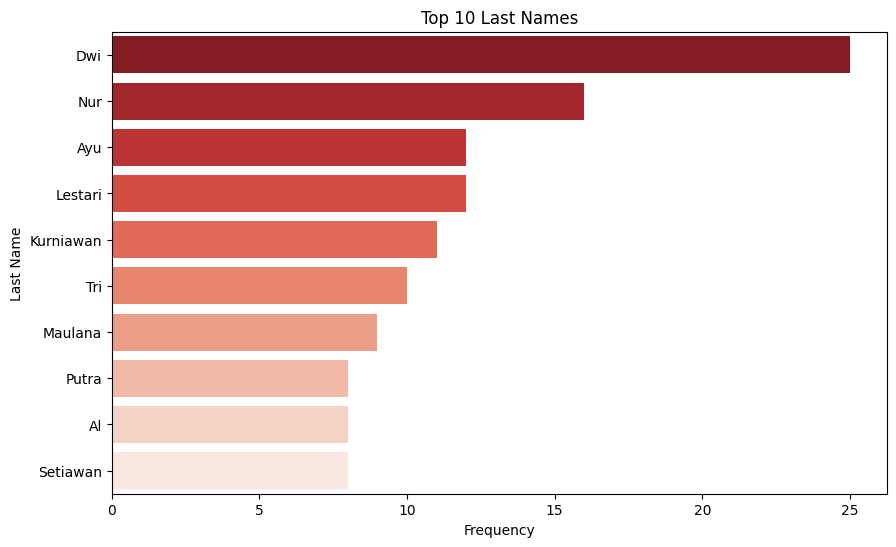

In [42]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Frekuensi', y='Last_Name', data=last_name_freq.head(10),hue='Last_Name', palette='Reds_r')
plt.title('Top 10 Last Names')
plt.xlabel('Frequency')
plt.ylabel('Last Name')
plt.show()

<h1>panjang nama</h1>

In [32]:
df["panjang_nama"]=df["Nama"].str.len()
df

,Nama,Jenis_Kelamin,panjang_nama,First_Name,Last_Name
0,hafizhan shidqi,m,15,Hafizhan,Shidqi
1,gandhi wibowo,m,13,Gandhi,Wibowo
2,aldio mahendra purwandrarto,m,27,Aldio,Mahendra
3,benny putra,m,11,Benny,Putra
4,vicky vernando dasta,m,20,Vicky,Vernando
...,...,...,...,...,...
1955,hadimah,f,7,Hadimah,NaN
1956,aprillia rahma wati,f,19,Aprillia,Rahma
1957,muhamad khoirunisa. m,m,21,Muhamad,Khoirunisa.
1958,sukandi,m,7,Sukandi,NaN


<h3>distribusi panjang nama</h3>

In [33]:
average=(df["panjang_nama"]).mean()
std_dev=df["panjang_nama"].std()
size=df["panjang_nama"].count()
df_stat=pd.DataFrame({
    "mean":[average],
    "std_dev":[std_dev],
    "size":[size]
})
df_stat

,mean,std_dev,size
0,12.773385,5.085715,1796


<h3>distribusi normal panjang nama</h3>

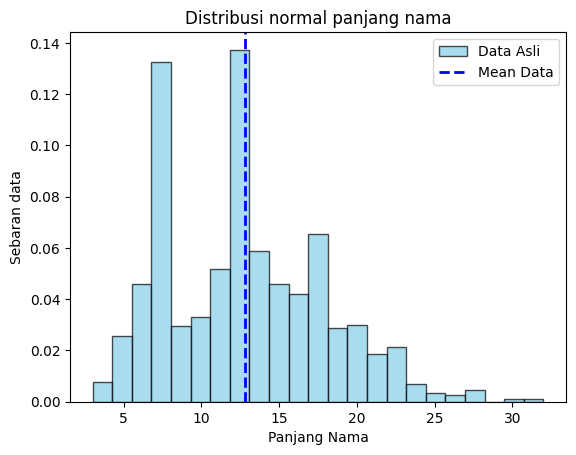

In [34]:
plt.hist(df["panjang_nama"], 
         bins='auto', density=True,
         alpha=0.7, color='skyblue', edgecolor='black', label='Data Asli')
plt.axvline(average, color='blue', linestyle='dashed', linewidth=2, label='Mean Data')
plt.title("Distribusi normal panjang nama")
plt.xlabel("Panjang Nama")
plt.ylabel("Sebaran data")
plt.legend()
plt.show()

<h3>distibusi normal panjang nama theoretical vs data</h3>

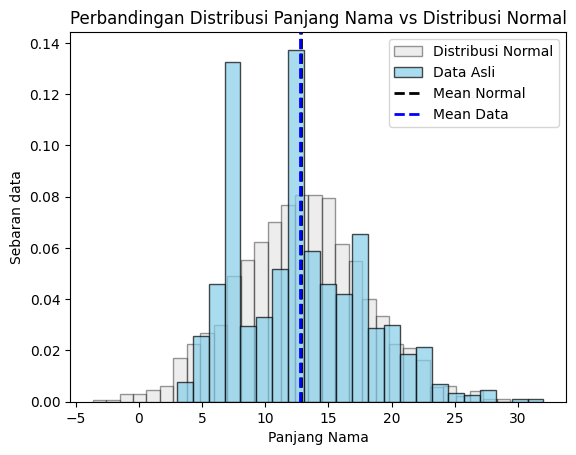

In [35]:
# Theoretical data
normal_dist = np.random.normal(average, std_dev, size)

# overlay
plt.hist(normal_dist, 
         bins='auto', density=True,
         color='lightgray', edgecolor='black', alpha=0.4, label='Distribusi Normal')

plt.hist(df["panjang_nama"], 
         bins='auto', density=True,
         alpha=0.7, color='skyblue', edgecolor='black', label='Data Asli')

# mean
plt.axvline(normal_dist.mean(), color='black', linestyle='dashed', linewidth=2, label='Mean Normal')
plt.axvline(average, color='blue', linestyle='dashed', linewidth=2, label='Mean Data')

# Labels and legend
plt.title("Perbandingan Distribusi Panjang Nama vs Distribusi Normal")
plt.xlabel("Panjang Nama")
plt.ylabel("Sebaran data")
plt.legend()
plt.show()

<h2>panjang nama laki-laki</h2>

<h3>distribusi normal panjang nama laki-laki</h3>

<h2>panjang nama perempuan</h2>

<h3>distribusi normal panjang nama perempuan</h3>